In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from SOM_clustering.som import SOM

In [9]:
df = pd.read_csv("Datas/selected_feature_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop_duplicates(inplace=True)
print(df.shape)

(38799, 7)


<Axes: >

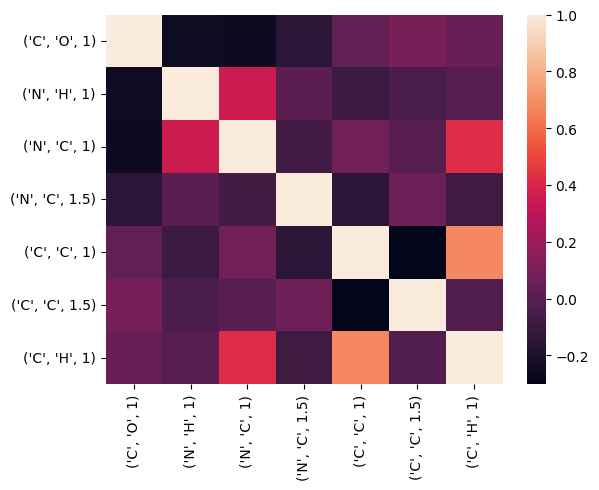

In [3]:
sns.heatmap(df.corr())

In [4]:
X = df.values
model = SOM(m = 3,
            n = 1, 
            dim=X.shape[1],
            max_iter=1,
            initiate_method="SOM++",
            learning_rate=0.5,
            neighbour_rad=5)
model.fit(X, epoch=50)
model.neurons

array([[[ 0,  2,  5,  0,  7,  4, 19]],

       [[ 0,  1,  4,  0, 16,  2, 30]],

       [[ 0,  1,  4,  0,  5, 17, 23]]], dtype=int64)

In [5]:
cluster_centers = model.neurons
cluster_centers = np.reshape(cluster_centers, (-1,X.shape[1]))
cluster_centers.shape

(3, 7)

In [6]:
cc = pd.DataFrame(cluster_centers, columns=df.columns)
cc.dropna(axis=1, inplace=True)
cc.round(4)

,"('C', 'O', 1)","('N', 'H', 1)","('N', 'C', 1)","('N', 'C', 1.5)","('C', 'C', 1)","('C', 'C', 1.5)","('C', 'H', 1)"
0,0,2,5,0,7,4,19
1,0,1,4,0,16,2,30
2,0,1,4,0,5,17,23


In [7]:
cc.round(4).to_excel("Datas/Stats/clustercenters.xlsx", index=False)
cc.round(4).to_csv("Datas/Stats/clustercenters.csv", index=False)